## Part 1: Building your Own Binary Classification Model

***

### Markdown Guides

> This is a blockquote.

Some of these words *are emphasized*.

Use two asterisks for **strong emphasis**.

*   Another item in the list.

This is an [example link](http://example.com/).

$x = x + y$

[text to appear as link](#linkhandle)

Images inline
![image](https://imgbbb.com/images/2019/12/18/Screenshot-2019-12-18-at-12.55.36-PM.png)

You work for a bank as a business data analyst in the credit card risk-modeling department. Your bank conducted a bold experiment three years ago: for a single day it quietly issued credit cards to everyone who applied, regardless of their credit risk, until the bank had issued 600 cards without screening applicants.

After three years, 150, or 25%, of those card recipients defaulted: they failed to pay back at least some of the money they owed. However, the bank collected very valuable proprietary data that it can now use to optimize its future card-issuing process.

The bank initially collected six pieces of data about each person:

· Age

· Years at current employer

· Years at current address

· Income over the past year

· Current credit card debt, and

· Current automobile debt

In addition, the bank now has a binary outcome: default = 1, and no default = 0.

Your first assignment is to analyze the data and create a binary classification model to forecast future defaults.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport
#import graphviz

# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


np.random.seed(0)

from pycaret.classification import *
#from pycaret.clustering import *

from pycaret.classification import models

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.option_context('float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,UniqueApplicantID,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,1,32.53,9.39,0.30,37843.68,-3246.66,-4794.71,0
1,2,34.58,11.97,1.49,65765.23,-15597.78,-17632.17,1
2,3,37.70,12.46,0.09,61002.29,-11401.92,-7910.24,1
3,4,28.68,1.39,1.84,19952.73,-1233.38,-2408.10,0
4,5,32.61,7.49,0.23,24970.13,-1135.68,-397.32,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UniqueApplicantID   200 non-null    int64  
 1   Age                 200 non-null    float64
 2   YearsatEmployer     200 non-null    float64
 3   YearsatAddress      200 non-null    float64
 4   Income              200 non-null    float64
 5   CreditCardDebt      200 non-null    float64
 6   AutomobileDebt      200 non-null    float64
 7   Default             200 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 12.6 KB


In [5]:
df.describe(include='all')

,UniqueApplicantID,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,34.666050,8.614550,0.779300,48439.955200,-3202.109350,-6378.073550,0.250000
std,57.879185,8.223616,6.790097,0.620515,47982.460353,3901.792893,7491.195603,0.434099
min,1.000000,20.190000,0.040000,0.010000,11522.100000,-32050.380000,-55418.570000,0.000000
25%,50.750000,28.500000,3.400000,0.310000,23207.965000,-4242.417500,-7902.882500,0.000000
50%,100.500000,33.130000,7.500000,0.620000,33884.085000,-1822.000000,-3922.680000,0.000000
75%,150.250000,40.227500,12.520000,1.052500,58330.222500,-810.920000,-2101.177500,0.250000
max,200.000000,55.720000,31.650000,3.700000,451319.670000,34.160000,1747.240000,1.000000


In [6]:
df.shape

(200, 8)

In [7]:
df.columns

Index(['UniqueApplicantID ', 'Age', 'YearsatEmployer', 'YearsatAddress', 'Income', 'CreditCardDebt', 'AutomobileDebt', 'Default'], dtype='object')

## Data Visualization

### Univariate Data Exploration

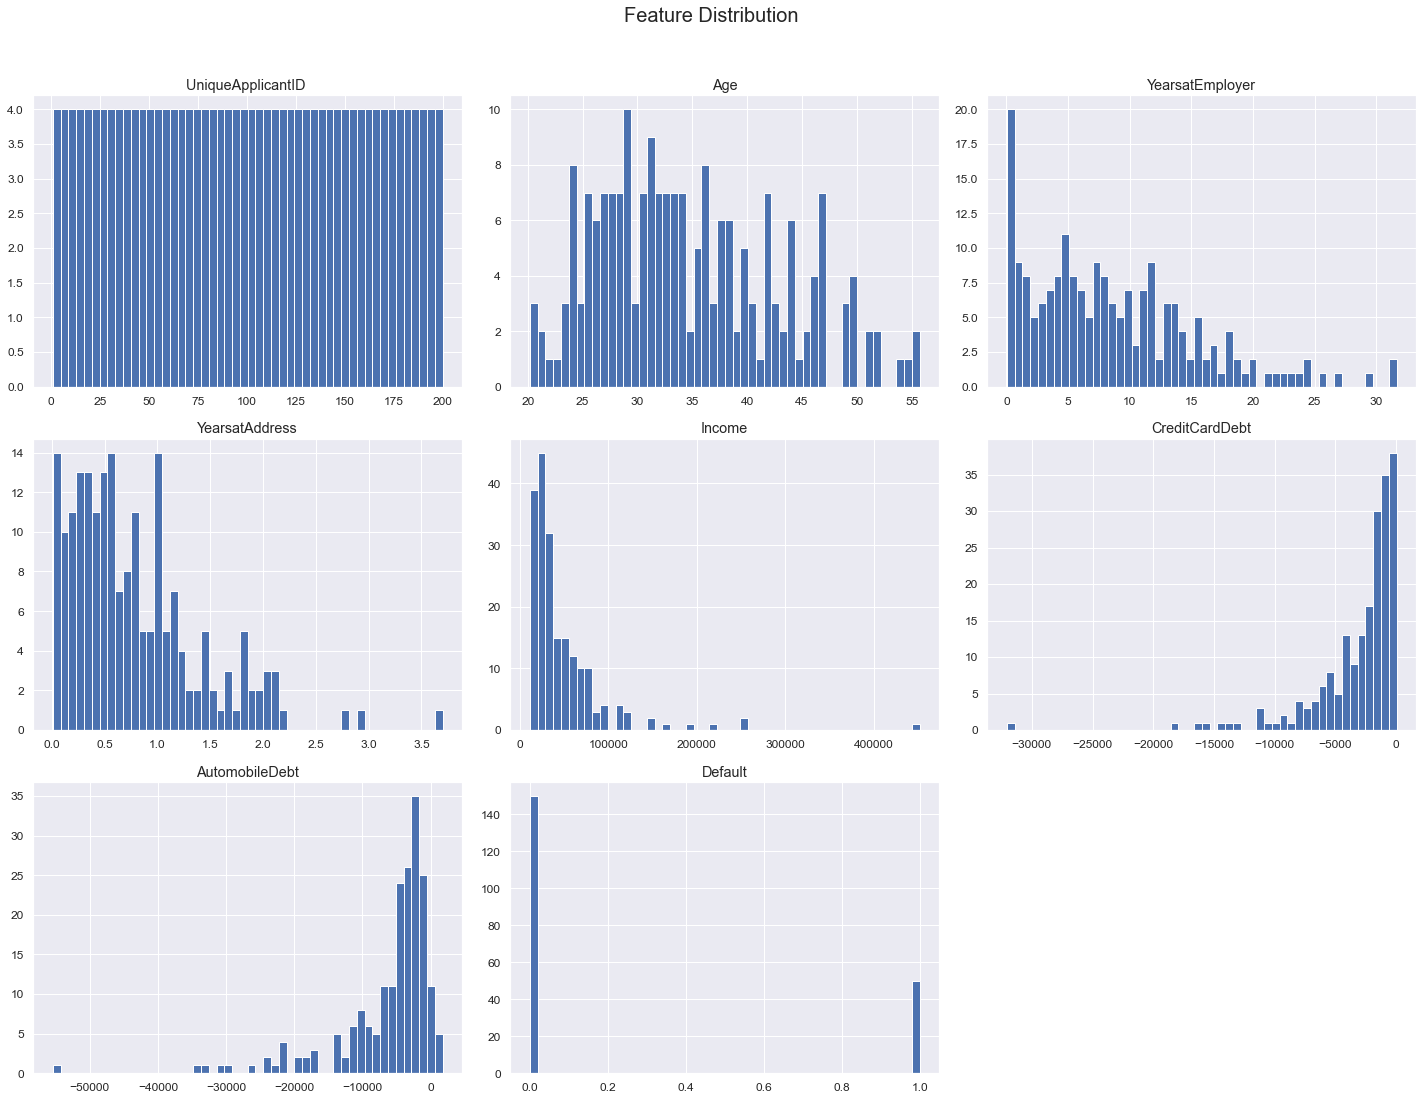

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

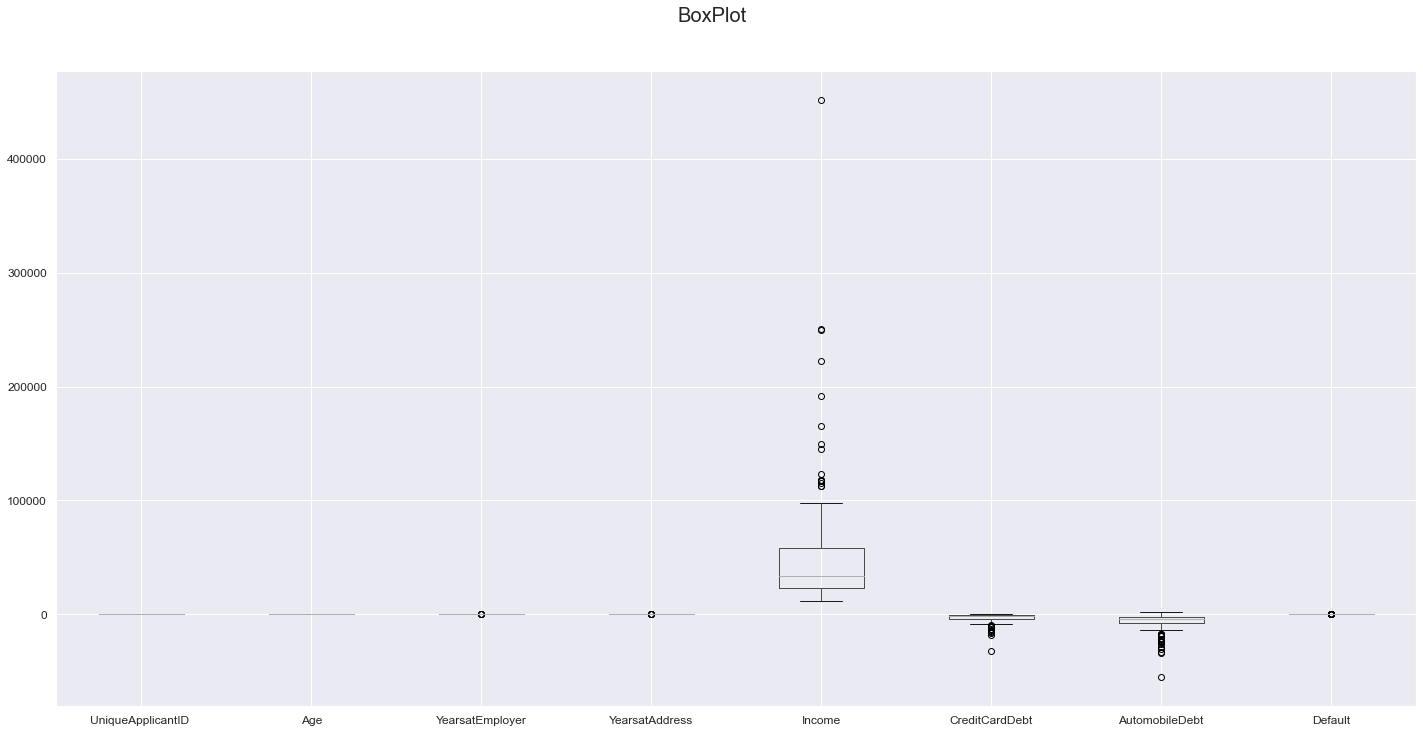

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Correlation

In [10]:
df.corr()

,UniqueApplicantID,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
UniqueApplicantID,1.000000,-0.108655,-0.050498,-0.107489,-0.124132,0.079155,0.096278,-0.019200
Age,-0.108655,1.000000,0.539530,0.076249,0.457727,-0.302220,-0.336250,-0.180464
YearsatEmployer,-0.050498,0.539530,1.000000,0.069504,0.612239,-0.441376,-0.447098,-0.306542
YearsatAddress,-0.107489,0.076249,0.069504,1.000000,0.131132,-0.097230,-0.087576,0.071917
Income,-0.124132,0.457727,0.612239,0.131132,1.000000,-0.710735,-0.654748,-0.053031
CreditCardDebt,0.079155,-0.302220,-0.441376,-0.097230,-0.710735,1.000000,0.602239,-0.197692
AutomobileDebt,0.096278,-0.336250,-0.447098,-0.087576,-0.654748,0.602239,1.000000,-0.100861
Default,-0.019200,-0.180464,-0.306542,0.071917,-0.053031,-0.197692,-0.100861,1.000000


In [11]:
df.corr()["Default"].sort_values()

YearsatEmployer      -0.306542
CreditCardDebt       -0.197692
Age                  -0.180464
AutomobileDebt       -0.100861
Income               -0.053031
UniqueApplicantID    -0.019200
YearsatAddress        0.071917
Default               1.000000
Name: Default, dtype: float64

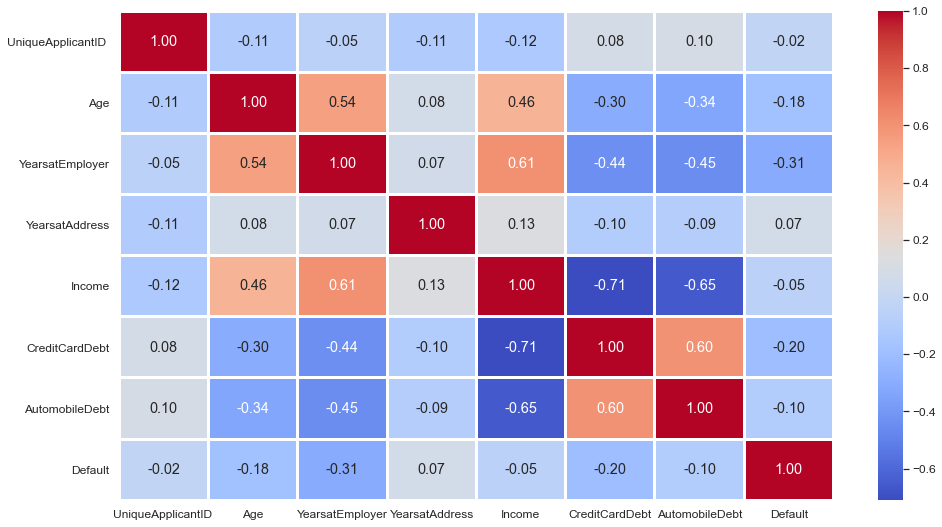

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Pairplots

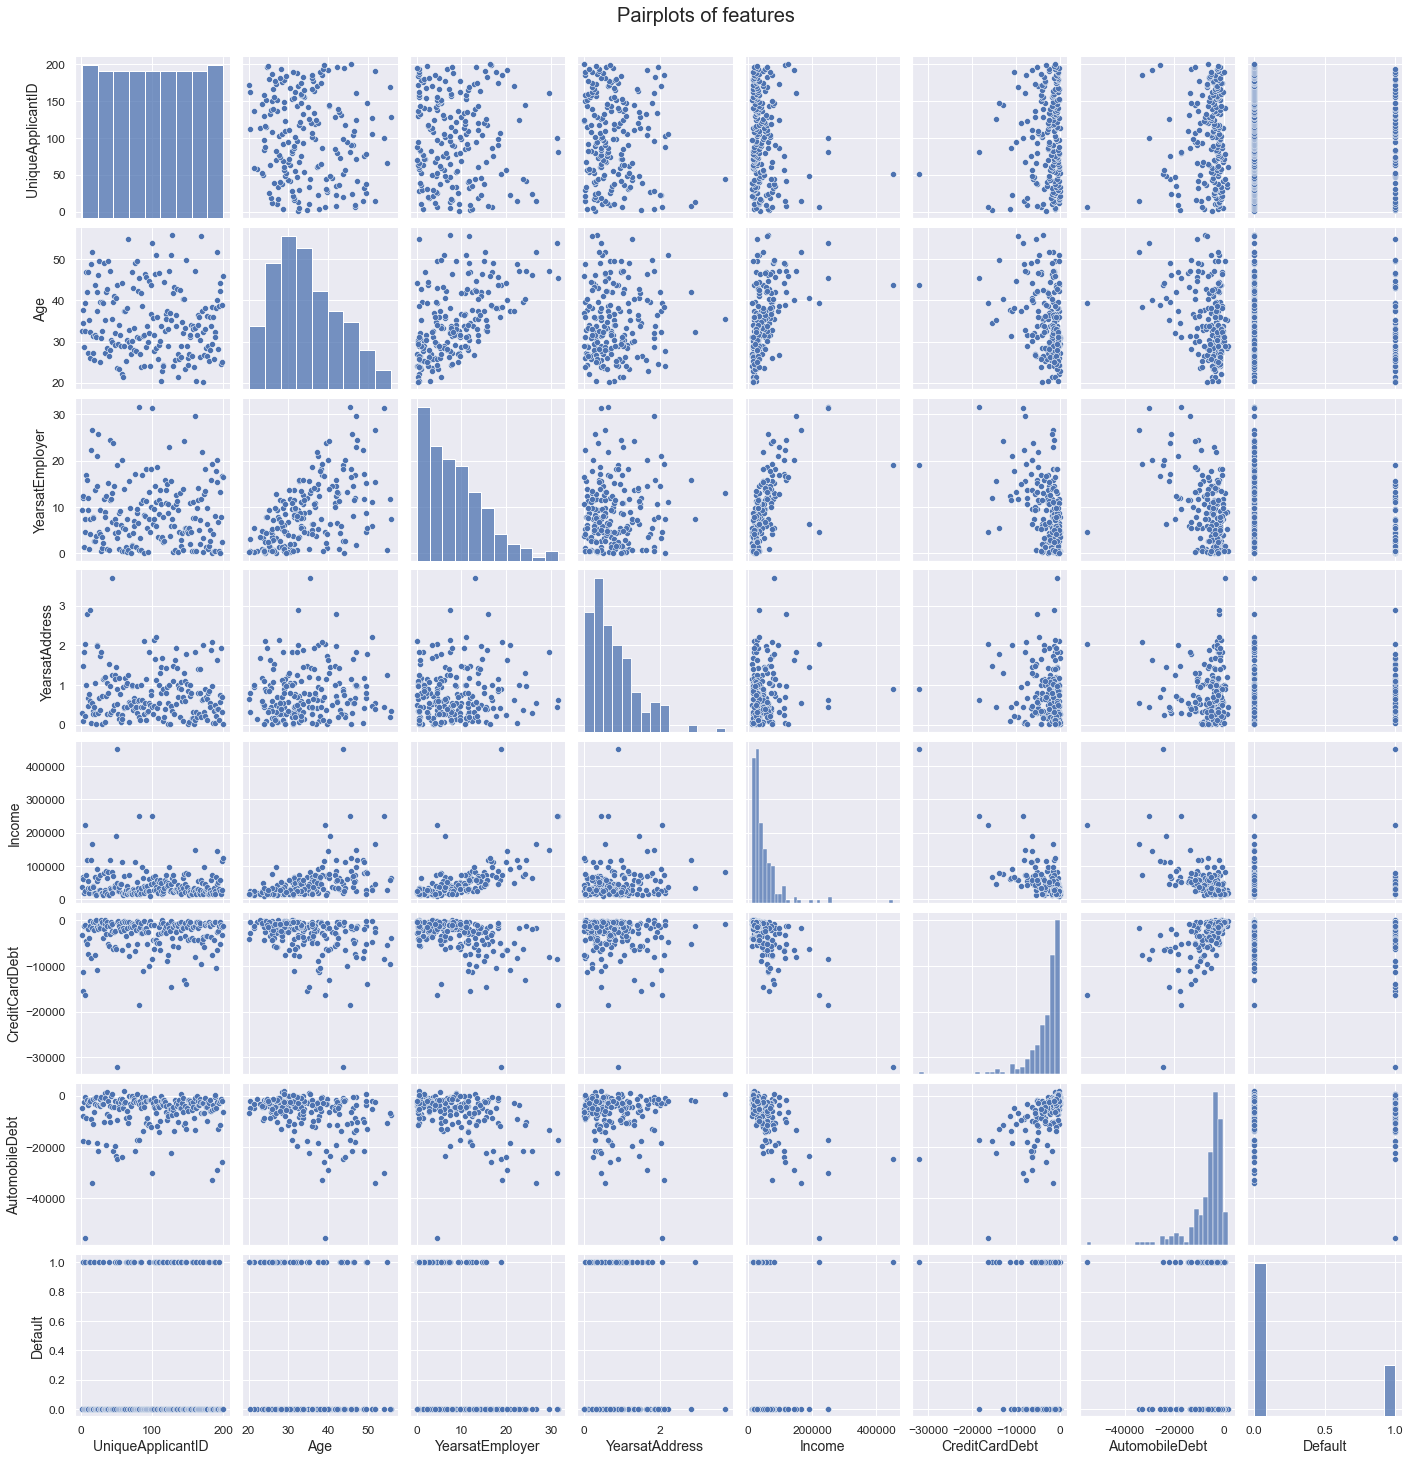

In [13]:
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

## Data Preprocessing

### Drop unwanted features

In [14]:
df.columns

Index(['UniqueApplicantID ', 'Age', 'YearsatEmployer', 'YearsatAddress', 'Income', 'CreditCardDebt', 'AutomobileDebt', 'Default'], dtype='object')

In [15]:
df.drop(['UniqueApplicantID '], axis=1, inplace=True)

In [16]:
df.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,32.53,9.39,0.30,37843.68,-3246.66,-4794.71,0
1,34.58,11.97,1.49,65765.23,-15597.78,-17632.17,1
2,37.70,12.46,0.09,61002.29,-11401.92,-7910.24,1
3,28.68,1.39,1.84,19952.73,-1233.38,-2408.10,0
4,32.61,7.49,0.23,24970.13,-1135.68,-397.32,0


### Treat Missing Values

In [17]:
df.isnull().sum()

Age                0
YearsatEmployer    0
YearsatAddress     0
Income             0
CreditCardDebt     0
AutomobileDebt     0
Default            0
dtype: int64

### Treat Duplicate Values

In [18]:
df.duplicated(keep='first').sum()

0

### Train Test Split

In [19]:
X = df.iloc[:,:]
y = df.iloc[:,:]

### Train Test Split Cont'd

In [20]:
X.values, y.values

(array([[    32.53,      9.39,      0.3 , ...,  -3246.66,  -4794.71,
              0.  ],
        [    34.58,     11.97,      1.49, ..., -15597.78, -17632.17,
              1.  ],
        [    37.7 ,     12.46,      0.09, ..., -11401.92,  -7910.24,
              1.  ],
        ...,
        [    24.97,      2.37,      0.31, ...,  -1446.02,  -2100.69,
              0.  ],
        [    38.96,     16.69,      0.69, ...,  -3205.97, -25826.62,
              0.  ],
        [    45.87,     16.41,      0.01, ...,  -1195.03,  -6469.83,
              0.  ]]),
 array([[    32.53,      9.39,      0.3 , ...,  -3246.66,  -4794.71,
              0.  ],
        [    34.58,     11.97,      1.49, ..., -15597.78, -17632.17,
              1.  ],
        [    37.7 ,     12.46,      0.09, ..., -11401.92,  -7910.24,
              1.  ],
        ...,
        [    24.97,      2.37,      0.31, ...,  -1446.02,  -2100.69,
              0.  ],
        [    38.96,     16.69,      0.69, ...,  -3205.97, -25826.62,
   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 7), (40, 7), (160, 7), (40, 7))

### Train Test Split to create Train, Validation and Test Set

In [23]:
#Set test set size
X_df, X_test, y_df, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0) 

In [24]:
X_df.shape, X_test.shape, y_df.shape, y_test.shape

((160, 7), (40, 7), (160, 7), (40, 7))

In [25]:
X_train, X_val = train_test_split(X_df, test_size=0.2, random_state=0)

In [26]:
X_train.shape, X_val.shape

((128, 7), (32, 7))

### Model Training

Question: What is your model?
Give it as a function of the two or more of the six inputs. For example: (Age +
Years at Current Address)/Income [not a great model!].

In [27]:
df.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,32.53,9.39,0.30,37843.68,-3246.66,-4794.71,0
1,34.58,11.97,1.49,65765.23,-15597.78,-17632.17,1
2,37.70,12.46,0.09,61002.29,-11401.92,-7910.24,1
3,28.68,1.39,1.84,19952.73,-1233.38,-2408.10,0
4,32.61,7.49,0.23,24970.13,-1135.68,-397.32,0


In [28]:
firstmodel = df[['Age','YearsatEmployer','Default']]

In [29]:
firstmodel.head()

,Age,YearsatEmployer,Default
0,32.53,9.39,0
1,34.58,11.97,1
2,37.70,12.46,1
3,28.68,1.39,0
4,32.61,7.49,0


### Using PyCaret

In [30]:
exp1 = setup(data = firstmodel, target = 'Default', session_id=0, normalize=True) 

,Description,Value
0,session_id,0
1,Target,Default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [32]:
compare_models(exclude=['catboost','lightgbm','xgboost','lda','qda','mlp','nb','ridge','gpc'],fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7339,0.6854,0.0286,0.1000,0.0444,0.0250,0.0320,1.1120
rf,Random Forest Classifier,0.7045,0.5288,0.2393,0.4000,0.2932,0.1259,0.1339,0.1620
et,Extra Trees Classifier,0.7045,0.5528,0.2107,0.3800,0.2635,0.1037,0.1108,0.1320
svm,SVM - Linear Kernel,0.6981,0.0000,0.3929,0.2603,0.3094,0.1693,0.1800,0.0140
knn,K Neighbors Classifier,0.6907,0.6261,0.2143,0.3738,0.2691,0.0903,0.0978,0.0160
gbc,Gradient Boosting Classifier,0.6757,0.5632,0.2357,0.3333,0.2631,0.0693,0.0738,0.0400
dt,Decision Tree Classifier,0.6545,0.5461,0.3179,0.2979,0.3067,0.0825,0.0780,0.0140
ada,Ada Boost Classifier,0.6399,0.4706,0.1571,0.2217,0.1791,-0.0371,-0.0395,0.0600


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Next test your model, without changing any parameters, on the Test Set of 200 additional
applicants. See the Test Set spreadsheet.  It is part of the Data_For_Final_Project (below) and has both the training and test set.

What is your model’s new AUC on the Test Set?
Give two digits to the right of the decimal place.

In [33]:
df2 = pd.read_csv("test.csv")

In [34]:
df2.head()

,UniqueApplicantID,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,201,25.92,0.35,0.24,12180.60,-2057.28,-3696.31,1
1,202,27.80,4.47,0.37,38536.24,-6970.27,-3018.06,1
2,203,37.33,9.30,0.02,30601.95,-2891.77,-1673.64,0
3,204,28.00,8.43,1.06,15587.51,-38.11,-1757.87,0
4,205,39.24,5.40,0.74,27598.76,-775.59,-4374.05,0


In [35]:
df2.columns

Index(['UniqueApplicantID ', 'Age', 'YearsatEmployer', 'YearsatAddress', 'Income', 'CreditCardDebt', 'AutomobileDebt', 'Default'], dtype='object')

In [36]:
df2.drop(['UniqueApplicantID '], axis=1, inplace=True)

In [37]:
df2.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,25.92,0.35,0.24,12180.60,-2057.28,-3696.31,1
1,27.80,4.47,0.37,38536.24,-6970.27,-3018.06,1
2,37.33,9.30,0.02,30601.95,-2891.77,-1673.64,0
3,28.00,8.43,1.06,15587.51,-38.11,-1757.87,0
4,39.24,5.40,0.74,27598.76,-775.59,-4374.05,0


In [38]:
testmodel = df2[['Age','YearsatEmployer','Default']]

In [39]:
testmodel.head()

,Age,YearsatEmployer,Default
0,25.92,0.35,1
1,27.80,4.47,1
2,37.33,9.30,0
3,28.00,8.43,0
4,39.24,5.40,0


In [40]:
exptest = setup(data = testmodel, target = 'Default', session_id=0, normalize=True) 

,Description,Value
0,session_id,0
1,Target,Default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
compare_models(exclude=['catboost','lightgbm','xgboost','lda','qda','mlp','nb','ridge','gpc'],fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7124,0.6557,0.0000,0.0000,0.0000,-0.0353,-0.0400,0.0160
gbc,Gradient Boosting Classifier,0.6976,0.5737,0.3214,0.4711,0.3718,0.1803,0.1931,0.0400
ada,Ada Boost Classifier,0.6907,0.5560,0.2179,0.3700,0.2727,0.0933,0.0993,0.0560
svm,SVM - Linear Kernel,0.6902,0.0000,0.1964,0.1800,0.1491,0.0434,0.0581,0.0120
rf,Random Forest Classifier,0.6899,0.6155,0.3179,0.3962,0.3520,0.1511,0.1532,0.1620
knn,K Neighbors Classifier,0.6622,0.5783,0.1893,0.3083,0.2282,0.0337,0.0356,0.0200
et,Extra Trees Classifier,0.6614,0.5776,0.2143,0.2917,0.2444,0.0463,0.0410,0.1380
dt,Decision Tree Classifier,0.6037,0.5102,0.3143,0.2821,0.2970,0.0228,0.0223,0.0120


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Both your own model and the forecast based on Eggertopia scores are binary classifications: they forecast one of just two outcomes: “Default” or “No Default.” Your boss is interested in the idea that it might be preferable instead to model and forecast profits and losses as continuous values, using a a multivariate linear regression model on the same six input variables. This idea has arisen because the bank has been reviewing individual profit and loss numbers for each customer over the three-year period and has made an interesting discovery: some defaulting customers carried so much debt for so long, and paid so much interest on it, that they were profitable for the bank even though they defaulted! Many customers who seem to have risky spending behaviors are also among the most profitable for a lending business. And, at the opposite extreme,customers who always paid off their cards in full each month never defaulted but were not very profitable: the bank barely broke even, or even lost money, on its“safest” borrowers.

Your boss asks you to forecast each applicant’s expected profitability, in dollars,before deciding whether or not to issue them a credit card. He wants to know how reliable this type of forecast would be: what is the range above and below the point estimate that will be correct 90% of the time?

### Part 4: Modeling Profitability Instead of Default

In [42]:
from pycaret.regression import *

In [43]:
###Revamp the dataset
df.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,32.53,9.39,0.30,37843.68,-3246.66,-4794.71,0
1,34.58,11.97,1.49,65765.23,-15597.78,-17632.17,1
2,37.70,12.46,0.09,61002.29,-11401.92,-7910.24,1
3,28.68,1.39,1.84,19952.73,-1233.38,-2408.10,0
4,32.61,7.49,0.23,24970.13,-1135.68,-397.32,0


In [44]:
df["Balance"] = df["Income"] + df["CreditCardDebt"] + df["AutomobileDebt"]

In [45]:
df.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default,Balance
0,32.53,9.39,0.30,37843.68,-3246.66,-4794.71,0,29802.31
1,34.58,11.97,1.49,65765.23,-15597.78,-17632.17,1,32535.28
2,37.70,12.46,0.09,61002.29,-11401.92,-7910.24,1,41690.13
3,28.68,1.39,1.84,19952.73,-1233.38,-2408.10,0,16311.25
4,32.61,7.49,0.23,24970.13,-1135.68,-397.32,0,23437.13


In [46]:
df.columns

Index(['Age', 'YearsatEmployer', 'YearsatAddress', 'Income', 'CreditCardDebt', 'AutomobileDebt', 'Default', 'Balance'], dtype='object')

In [47]:
linearmodeltrain = df[['Age', 'YearsatEmployer', 'YearsatAddress', 'Default', 'Balance']]

In [48]:
linearmodeltrain.head()

,Age,YearsatEmployer,YearsatAddress,Default,Balance
0,32.53,9.39,0.30,0,29802.31
1,34.58,11.97,1.49,1,32535.28
2,37.70,12.46,0.09,1,41690.13
3,28.68,1.39,1.84,0,16311.25
4,32.61,7.49,0.23,0,23437.13


In [49]:
regtrain = setup(data = linearmodeltrain, target = 'Balance', session_id=0, normalize=True) 

,Description,Value
0,session_id,0
1,Target,Balance
2,Original Data,"(200, 5)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(139, 4)"


In [50]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [51]:
compare_models(exclude=['catboost','lightgbm','xgboost','mlp','kr','huber','tr','ransac','par','ard','br',
                       'omp','llar','lar'],fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,16008.5290,1311748690.2231,28809.5419,0.4007,0.5933,0.9746,0.1620
en,Elastic Net,16615.2664,1300457340.8000,29161.7668,0.3636,0.5970,1.0125,0.0120
gbr,Gradient Boosting Regressor,16433.5681,1352896536.7823,29473.6690,0.3623,0.6252,1.1756,0.0280
ada,AdaBoost Regressor,17732.3773,1385895591.0150,30381.0917,0.3109,0.6169,1.0199,0.0380
et,Extra Trees Regressor,17125.9799,1377312101.6064,30279.4610,0.2841,0.5994,0.8895,0.1340
ridge,Ridge Regression,18073.7832,1298299206.4000,30119.2641,0.2776,0.7339,1.0731,0.0120
lasso,Lasso Regression,18177.0484,1301694656.0000,30222.6309,0.2706,0.7643,1.0852,0.0100
lr,Linear Regression,18177.8264,1301753145.6000,30223.7488,0.2705,0.7645,1.0853,0.0140
knn,K Neighbors Regressor,16834.7086,1486199372.8000,32653.7152,0.1389,0.5952,0.9567,0.0140
dt,Decision Tree Regressor,20306.3590,1643052896.3781,34946.7711,-0.0555,0.7499,0.9110,0.0140


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
###Revamp the dataset
df2.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default
0,25.92,0.35,0.24,12180.60,-2057.28,-3696.31,1
1,27.80,4.47,0.37,38536.24,-6970.27,-3018.06,1
2,37.33,9.30,0.02,30601.95,-2891.77,-1673.64,0
3,28.00,8.43,1.06,15587.51,-38.11,-1757.87,0
4,39.24,5.40,0.74,27598.76,-775.59,-4374.05,0


In [53]:
df2["Balance"] = df2["Income"] + df2["CreditCardDebt"] + df2["AutomobileDebt"]

In [54]:
df2.head()

,Age,YearsatEmployer,YearsatAddress,Income,CreditCardDebt,AutomobileDebt,Default,Balance
0,25.92,0.35,0.24,12180.60,-2057.28,-3696.31,1,6427.01
1,27.80,4.47,0.37,38536.24,-6970.27,-3018.06,1,28547.91
2,37.33,9.30,0.02,30601.95,-2891.77,-1673.64,0,26036.54
3,28.00,8.43,1.06,15587.51,-38.11,-1757.87,0,13791.53
4,39.24,5.40,0.74,27598.76,-775.59,-4374.05,0,22449.12


In [55]:
df2.columns

Index(['Age', 'YearsatEmployer', 'YearsatAddress', 'Income', 'CreditCardDebt', 'AutomobileDebt', 'Default', 'Balance'], dtype='object')

In [56]:
linearmodeltest = df2[['Age', 'YearsatEmployer', 'YearsatAddress', 'Default', 'Balance']]

In [57]:
linearmodeltest.head()

,Age,YearsatEmployer,YearsatAddress,Default,Balance
0,25.92,0.35,0.24,1,6427.01
1,27.80,4.47,0.37,1,28547.91
2,37.33,9.30,0.02,0,26036.54
3,28.00,8.43,1.06,0,13791.53
4,39.24,5.40,0.74,0,22449.12


In [58]:
regtest = setup(data = linearmodeltest, target = 'Balance', session_id=0, normalize=True) 

,Description,Value
0,session_id,0
1,Target,Balance
2,Original Data,"(200, 5)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(139, 4)"


In [59]:
models();

In [60]:
compare_models(exclude=['catboost','lightgbm','xgboost','mlp','kr','huber','tr','ransac','par','ard','br',
                       'omp','llar','lar'],fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,13945.7645,733732131.2000,25707.2404,0.2761,0.4871,0.4091,0.0140
en,Elastic Net,14549.9500,761693884.8000,26166.4506,0.2677,0.5000,0.4672,0.0140
ridge,Ridge Regression,16184.9561,788695686.4000,27167.2715,0.0744,0.5875,0.5049,0.0140
lasso,Lasso Regression,16285.7021,791794041.6000,27237.4469,0.0624,0.5981,0.5088,0.0140
lr,Linear Regression,16286.6801,791814508.8000,27237.9438,0.0623,0.5982,0.5088,0.0140
rf,Random Forest Regressor,16767.5652,977484391.8037,30802.2086,-0.4447,0.5201,0.4760,0.1400
ada,AdaBoost Regressor,17321.7950,1076188672.8329,31866.9730,-0.5508,0.5485,0.5533,0.0520
et,Extra Trees Regressor,16957.8842,1015172375.4803,30902.9976,-0.7190,0.5322,0.4979,0.1240
dt,Decision Tree Regressor,19228.6172,1208786425.0147,34221.6049,-1.0757,0.6547,0.5659,0.0120
gbr,Gradient Boosting Regressor,17282.2154,1179511061.3693,33424.7902,-1.3178,0.5284,0.4672,0.0300


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

#### Python code done by Dennis Lam